In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('../data/raw/dataset_cleaned_file_v7.csv')

In [6]:
data.value_counts('genre')
data.head()

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count
0,NaN,Ardian Bujupi,NaN,2023,Skena Koh,0,9142376,Skena Koh by Ardian Bujupi,"{'year': 2023, 'month': 5, 'day': 19}",2023-05-19 00:00:00,"{'unreviewed_annotations': 0, 'hot': False}","Ich weiß genau, wie es anfing Hab' mich noch...",Friday,175
1,NaN,Ardian Bujupi,NaN,2023,Maria,0,9014456,Maria by Ardian Bujupi,"{'year': 2023, 'month': 4, 'day': 14}",2023-04-14 00:00:00,"{'unreviewed_annotations': 0, 'hot': False}",Ey-yeah-yeah-yeah-yeah-yeah Ey-ja-ja-ja-ja-j...,Friday,98
2,NaN,Ardian Bujupi,NaN,2023,3 Panamera,0,8881172,3 Panamera by Ardian Bujupi,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03 00:00:00,"{'unreviewed_annotations': 0, 'hot': False}","Blick' durch die Cartier, nice Ferrari, Ital...",Friday,214
3,NaN,Ardian Bujupi,NaN,2022,Atlantik,0,8625082,Atlantik by Ardian Bujupi,"{'year': 2022, 'month': 12, 'day': 9}",2022-12-09 00:00:00,"{'unreviewed_annotations': 0, 'hot': False}",Ruf nur einmal an Und ich fliege für dich üb...,Friday,129
4,NaN,Ardian Bujupi,NaN,2022,K.i.m.B,0,8146443,K.i.m.B by Ardian Bujupi,"{'year': 2022, 'month': 7, 'day': 1}",2022-07-01 00:00:00,"{'unreviewed_annotations': 0, 'hot': False}","Komm in mein'n Block (Ey, ey) Aussicht von h...",Friday,195


# 1.In welchem Monat wurden die meisten Songs released nach Genre (oder allgemein)

In [120]:
# Extrahiere den Monat aus der Spalte "release_date_for_display" und füge ihn in eine neue Spalte namens "month" ein
data["month"] = pd.to_datetime(data["release_date_for_display"]).dt.month.fillna(0).astype(int)

# Zeige das DataFrame mit der neuen "month"-Spalte an
year_1982_data = data[data["release_year"] == 1982]



In [126]:
year_1982_data = data[(data["release_year"] == 1982) & (data["release_date_components_raw"].notnull())]
year_1982_data


,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count,month
548,NaN,Geier Sturzflug,NaN,1982,Bruttosozialprodukt,0,2015852,Bruttosozialprodukt by Geier Sturzflug,"{'year': 1982, 'month': 7, 'day': 21}",1982-07-21 00:00:00,"{'unreviewed_annotations': 1, 'hot': False, 'p...",Wenn früh am Morgen die Werksirene dröhnt Un...,Wednesday,102,7


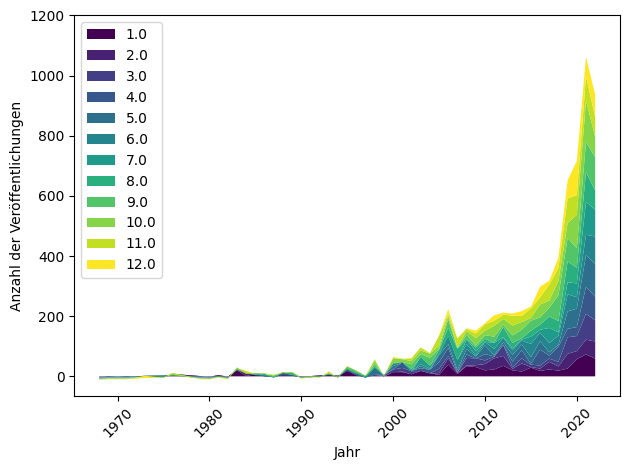

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

# Ersetze NaN-Werte in der Spalte "months" durch -1
songs_per_year_month_filled = songs_per_year_month.fillna(-1)

# Wandle die Spalte "months" in Integer um
songs_per_year_month_filtered = songs_per_year_month_filled.astype(int)

# Filtere Jahre von 1968 bis 2022
songs_per_year_month_filtered = songs_per_year_month_filtered.loc[1968:2022]

# Definiere die Farben für jeden Monat
num_months = songs_per_year_month_filtered.shape[1]
colors = plt.cm.viridis(np.linspace(0, 1, num_months))

# Plotten der gestapelten Linien mit individuellen Farben pro Monat
lines = plt.stackplot(
    songs_per_year_month_filtered.index,
    songs_per_year_month_filtered.values.T,
    labels=songs_per_year_month_filtered.columns,
    colors=colors
)

# Einstellungen für das Diagramm
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Veröffentlichungen")
plt.legend(loc="upper left")

# Anpassung der Achsenbeschriftungen
plt.xticks(rotation=45)
plt.yticks(range(0, 1201, 200))

# Hinzufügen von Tooltips für die einzelnen Punkte
cursors = mplcursors.cursor(lines, hover=True)
cursors.connect("add", lambda sel: sel.annotation.set_text(f"Count: {sel.target[1]:.0f}"))

# Anzeigen des Diagramms
plt.tight_layout()
plt.show()


In [138]:
!pip install mplcursors

                                              0.0/89.0 kB ? eta -:--:--
     ---------------------------------------- 89.0/89.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21077 sha256=b76b079012a202372b6276692df073942c145a23e7e3ccc765715d600d3793ad
  Stored in directory: c:\users\marcb\appdata\local\pip\cache\wheels\b5\5b\fb\aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


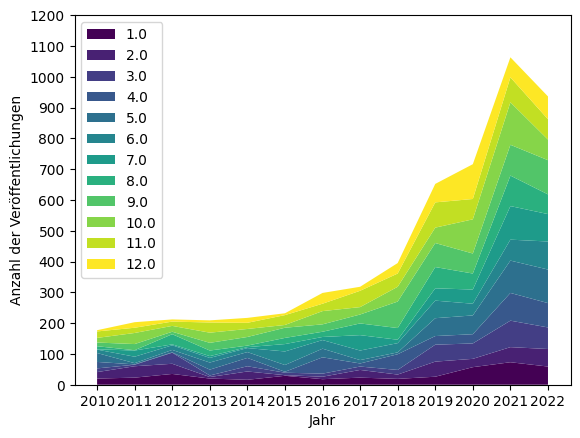

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

# Ersetze NaN-Werte in der Spalte "months" durch -1
songs_per_year_month_filled = songs_per_year_month.fillna(-1)

# Wandle die Spalte "months" in Integer um
songs_per_year_month_filtered = songs_per_year_month_filled.astype(int)

# Filtere Jahre von 2010 bis 2022
songs_per_year_month_filtered = songs_per_year_month_filtered.loc[2010:2022]

# Definiere die Farben für jeden Monat
num_months = songs_per_year_month_filtered.shape[1]
colors = plt.cm.viridis(np.linspace(0, 1, num_months))

# Plotten der gestapelten Linien mit individuellen Farben pro Monat
lines = plt.stackplot(
    songs_per_year_month_filtered.index,
    songs_per_year_month_filtered.values.T,
    labels=songs_per_year_month_filtered.columns,
    colors=colors
)

# Einstellungen für das Diagramm
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Veröffentlichungen")
plt.legend(loc="upper left")

# Anpassung der Achsenbeschriftungen
plt.xticks(songs_per_year_month_filtered.index)
plt.yticks(range(0, 1201, 100))

# Hinzufügen von Tooltips für die einzelnen Punkte
cursors = mplcursors.cursor(lines, hover=True)
cursors.connect("add", lambda sel: sel.annotation.set_text(f"Count: {sel.target[1]:.0f}"))

# Anzeigen des Diagramms
plt.show()


In [147]:
data_2013 = data[data["release_year"] == 2013]

# Gruppiere nach Monat und Genre und summiere die Anzahl der Songs
songs_per_month_genre = data_2013.groupby(["month", "genre"])["songtitle"].count()

# Zeige das Ergebnis an
print(songs_per_month_genre)


month  genre   
0      Pop         19
       Rock        13
       Schlager    17
1      Pop          9
       Rap          8
       Rock         1
       Schlager     1
3      Pop          1
       Rap          1
       Rock         2
4      Rap         11
       Rock         7
5      Pop          2
       Rap          1
       Rock         4
6      Rap         14
       Rock         1
7      Rap          5
8      Rap         18
9      Rap         18
       Schlager     3
10     Rap         13
       Rock         2
       Schlager    15
11     Pop         14
       Rap         11
       Rock         5
12     Rap          3
       Schlager     4
Name: songtitle, dtype: int64


# 2.Welche Orte werden in Rap Songs genannt auf Landkarte Visualisieren

#### Manuelle Löschung der Einzelnen falschen Werte

In [57]:
index_to_delete = 73   # Index des zu löschenden Beitrags

# Verwende den Index, um den Beitrag aus der Tabelle zu löschen
location_counts = location_counts.drop(index_to_delete)

<bound method NDFrame.head of         Location  Count
1         Berlin    459
5          Paris    123
6        Hamburg    119
7       New York     98
10        London     48
..           ...    ...
377         Riga      1
378  Kaliningrad      1
379   Barrington      1
380          Aue      1
381   Ingolstadt      1

[355 rows x 2 columns]>


In [68]:
top50_locations_counts = location_counts.head(50)
print(top50_locations_counts)

           Location  Count
1            Berlin    459
5             Paris    123
6           Hamburg    119
7          New York     98
10           London     48
15        Kreuzberg     33
16          Germany     33
17            Halle     31
18        Amsterdam     31
19            Dubai     30
20       Schöneberg     29
21            Miami     29
22        Tempelhof     28
24        Las Vegas     28
25             Bonn     27
26           Mexico     24
27     Bad Segeberg     24
28           Bogotá     23
29           Bergen     23
30          Chicago     23
31          Holland     22
32    San Francisco     22
33         Bordeaux     21
34        Stuttgart     21
35             Bali     20
36         Thailand     20
37          Montana     20
39             Köln     19
40        Marseille     19
41        Offenbach     18
45            China     17
46            Ghana     16
52            Venlo     14
53          Granada     14
54        Bielefeld     14
55            Ibiza     14
5

In [66]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim
from geotext import GeoText

# Erstelle eine Karte mit Folium
m = folium.Map(location=[0, 0], zoom_start=2)

# Erstelle einen Farbverlauf für die Häufigkeit
max_count = top50_locations_counts['Count'].max()
color_scale = folium.LinearColormap(['green', 'yellow', 'red', 'blue'], vmin=0, vmax=50)

# Markiere die Standorte auf der Karte mit Farben basierend auf der Häufigkeit
for index, row in top50_locations_counts.iterrows():
    location = row['Location']
    count = row['Count']
    geolocator = Nominatim(user_agent="my_app")
    geocode = geolocator.geocode(location)
    if geocode is not None:
        lat = geocode.latitude
        lon = geocode.longitude
        if count > 50:
            # Outlier-Markierung in blauer Farbe
            color = 'blue'
        else:
            # Farbe basierend auf der Häufigkeit
            color = color_scale(count)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            tooltip=f"{location}: {count}"
        ).add_to(m)

# Füge den Farbverlauf zur Karte hinzu
color_scale.caption = 'Häufigkeit'
m.add_child(color_scale)

# Anzeigen der Karte
m


In [18]:
!pip install geotext
!pip install geopy
!pip install folium
!pip install spacy
!python -m spacy download de_core_news_sm
!pip install geopandas

                                              0.0/14.6 MB ? eta -:--:--
                                              0.3/14.6 MB 5.9 MB/s eta 0:00:03
     -                                        0.7/14.6 MB 7.3 MB/s eta 0:00:02
     ---                                      1.1/14.6 MB 7.8 MB/s eta 0:00:02
     ----                                     1.5/14.6 MB 8.0 MB/s eta 0:00:02
     -----                                    1.9/14.6 MB 8.1 MB/s eta 0:00:02
     ------                                   2.3/14.6 MB 8.2 MB/s eta 0:00:02
     -------                                  2.7/14.6 MB 8.3 MB/s eta 0:00:02
     --------                                 3.2/14.6 MB 8.4 MB/s eta 0:00:02
     ---------                                3.6/14.6 MB 8.4 MB/s eta 0:00:02
     ----------                               4.0/14.6 MB 8.4 MB/s eta 0:00:02
     -----------                              4.4/14.6 MB 8.5 MB/s eta 0:00:02
     -------------                            4.8/14.6 MB 8

Beispielsatz bilden, tags angucken und tag unterschiede raussuchen die städte identifizieren

In [70]:
import folium
import pandas as pd

# Erstelle eine Karte mit Folium
m = folium.Map(location=[0, 0], zoom_start=2)

# Markiere die Standorte auf der Karte
for index, row in top50_locations_counts.iterrows():
    location = row['Location']
    count = row['Count']
    geolocator = Nominatim(user_agent="my_app")
    geocode = geolocator.geocode(location)
    if geocode is not None:
        lat = geocode.latitude
        lon = geocode.longitude
        folium.CircleMarker(
            location=[lat, lon],
            radius=count/10,
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(m)

# Anzeigen der Karte
m
#Größe = Häufigkeit

In [71]:
import folium
import pandas as pd

# Erstelle eine Karte mit Folium
m = folium.Map(location=[0, 0], zoom_start=2)

# Markiere die Standorte auf der Karte
for index, row in top50_locations_counts.iterrows():
    location = row['Location']
    count = row['Count']
    geolocator = Nominatim(user_agent="my_app")
    geocode = geolocator.geocode(location)
    if geocode is not None:
        lat = geocode.latitude
        lon = geocode.longitude
        popup_text = f"Location: {location}<br>Count: {count}"
        folium.Marker(
            location=[lat, lon],
            popup=popup_text
        ).add_to(m)

# Anzeigen der Karte
m


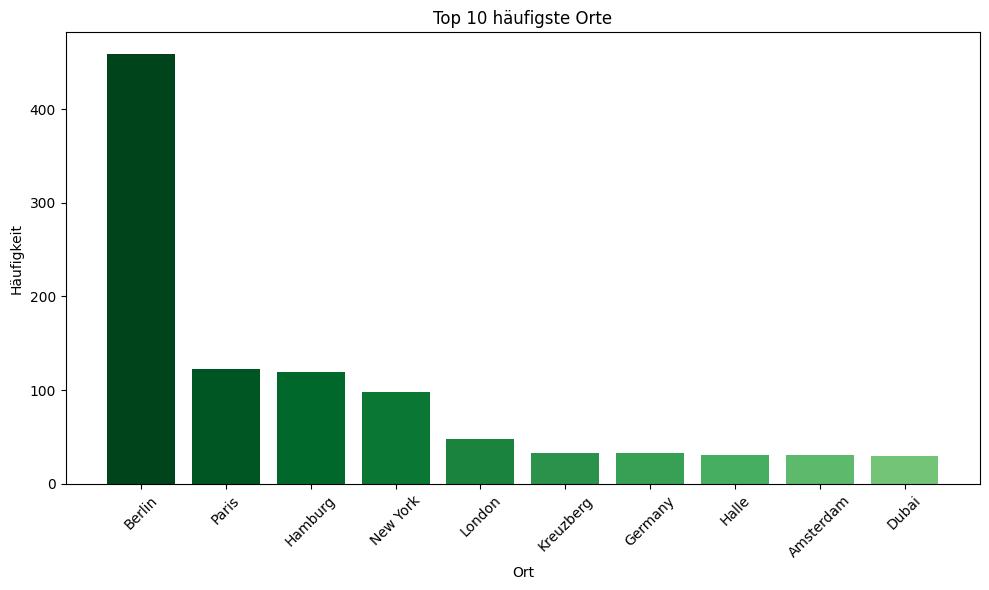

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Top 10 häufigste Orte
top10_locations_counts = top50_locations_counts.head(10)

# Farbverlauf definieren
colors = plt.cm.Greens(np.linspace(1, 0.5, len(top10_locations_counts)))

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(top10_locations_counts['Location'], top10_locations_counts['Count'], color=colors)
plt.xlabel('Ort')
plt.ylabel('Häufigkeit')
plt.title('Top 10 häufigste Orte')
plt.xticks(rotation=45)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


# 3.In wie vielen Songs kommt da Thema Liebe vor , pro Genre vielleicht

In [75]:
!pip install textblob

                                              0.0/636.8 kB ? eta -:--:--
     -------------------                   337.9/636.8 kB 20.5 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 9.9 MB/s eta 0:00:00


In [53]:
from textblob import TextBlob

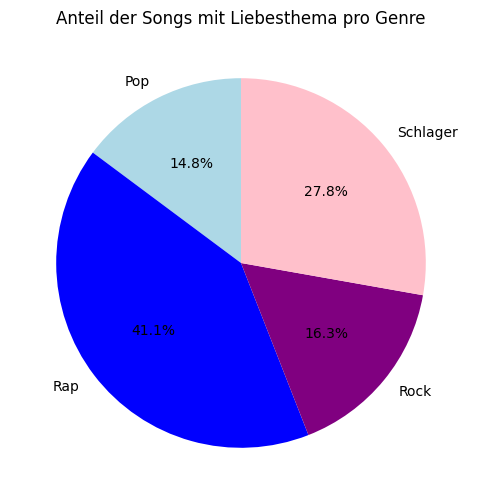

In [54]:
# 1. Lade die Liste der Liebeswörter
with open("../data/raw/liebe_sentiment.txt", "r", encoding="utf-8") as f:
    liebe_wörter = [line.strip() for line in f.readlines()]

# 2. Sentiment-Analyse auf dem Lyrics-Feld ausführen
data["sentiment"] = data["lyrics"].apply(lambda x: TextBlob(x).sentiment.polarity)

# 3. Durchsuche das DataFrame nach Liebesworten
data["contains_liebe"] = data["lyrics"].apply(lambda x: any([liebe_wort.lower() in x.lower() for liebe_wort in liebe_wörter]))

# 4. Gruppierung und Berechnung des Prozentsatzes der Songs pro Genre, die das Thema Liebe enthalten
liebe_prozent = data.groupby("genre")["contains_liebe"].mean() * 100

# 5. Visualisierung des Ergebnisses als Kreisdiagramm
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['lightblue', 'blue', 'purple', 'pink']
ax.pie(liebe_prozent, labels=liebe_prozent.index, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title("Anteil der Songs mit Liebesthema pro Genre")
plt.show()





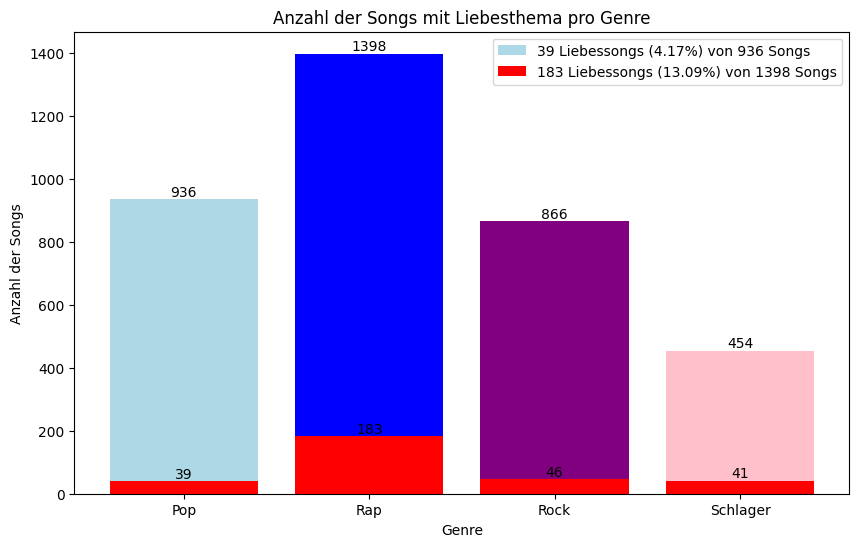

In [151]:
import matplotlib.pyplot as plt

# 1. Lade die Liste der Liebeswörter
with open("../data/raw/liebe_sentiment.txt", "r", encoding="utf-8") as f:
    liebe_wörter = [line.strip() for line in f.readlines()]

# 2. Durchsuche das DataFrame nach Liebesworten pro Genre und zähle die Anzahl der Songs
liebe_anzahl = data.groupby("genre")["lyrics"].apply(lambda x: x.str.contains('|'.join(liebe_wörter), case=False, regex=True).sum())
gesamt_anzahl = data.groupby("genre").size()

# 3. Berechne den Prozentsatz der Liebessongs pro Genre
prozentsatz_liebe = (liebe_anzahl / gesamt_anzahl) * 100

# 4. Visualisierung des Ergebnisses als Balkendiagramm
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['lightblue', 'blue', 'purple', 'pink']
x_pos = range(len(liebe_anzahl))
ax.bar(x_pos, gesamt_anzahl, color=colors, label='Gesamt')
ax.bar(x_pos, liebe_anzahl, color='red', label='Liebeslieder')
ax.set_xlabel("Genre")
ax.set_ylabel("Anzahl der Songs")
ax.set_title("Anzahl der Songs mit Liebesthema pro Genre")

# Beschrifte die Balken mit den Werten
for i, v in enumerate(gesamt_anzahl):
    ax.text(i, v, str(v), ha='center', va='bottom')
for i, v in enumerate(liebe_anzahl):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Setze die Genre-Namen als x-Achsenbeschriftung
ax.set_xticks(x_pos)
ax.set_xticklabels(liebe_anzahl.index)

# Erstelle die Legende mit dem Prozentsatz der Liebessongs
legend_text = [f"{liebe_anzahl[i]} Liebessongs ({prozentsatz_liebe[i]:.2f}%) von {gesamt_anzahl[i]} Songs" for i in range(len(liebe_anzahl))]
ax.legend(labels=legend_text)

plt.show()


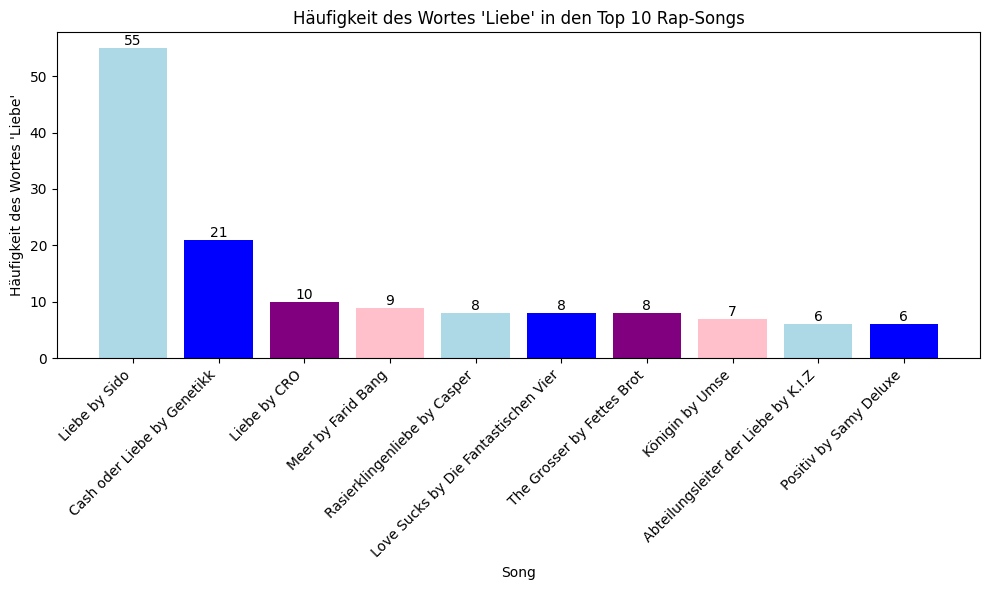

In [152]:
import matplotlib.pyplot as plt

# Filtere Daten nur für das Genre "Rap" und mit Lyrics
rap_data = data[data['genre'] == 'Rap']
rap_data_with_lyrics = rap_data[rap_data['lyrics'].notnull()]

# Berechne die Häufigkeit des Wortes "Liebe" für jeden Song
rap_data_with_lyrics['liebe_haeufigkeit'] = rap_data_with_lyrics['lyrics'].str.count('Liebe')

# Sortiere die Songs nach der Häufigkeit des Wortes "Liebe" in absteigender Reihenfolge
top_10_songs = rap_data_with_lyrics.nlargest(10, 'liebe_haeufigkeit')

# Extrahiere die Titel der Top 10 Songs und ihre Häufigkeit des Wortes "Liebe"
song_titles = top_10_songs['full_title']
liebe_haeufigkeit = top_10_songs['liebe_haeufigkeit']

# Visualisierung des Ergebnisses als Balkendiagramm
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['lightblue', 'blue', 'purple', 'pink']
x_pos = range(len(song_titles))
ax.bar(x_pos, liebe_haeufigkeit, color=colors)
ax.set_xlabel("Song")
ax.set_ylabel("Häufigkeit des Wortes 'Liebe'")
ax.set_title("Häufigkeit des Wortes 'Liebe' in den Top 10 Rap-Songs")

# Beschrifte die Balken mit den Werten
for i, v in enumerate(liebe_haeufigkeit):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Setze die Song-Titel als x-Achsenbeschriftung
ax.set_xticks(x_pos)
ax.set_xticklabels(song_titles, rotation=45, ha='right')

plt.tight_layout()
plt.show()
